# Example Portfolio Analysis

## Contents
1. [Load data](#ld)

In [1]:
%load_ext autoreload
%autoreload 2

# !pip install nb_black
%load_ext nb_black

&lt;IPython.core.display.Javascript object&gt;

In [2]:
import sys
sys.path.append("..")

&lt;IPython.core.display.Javascript object&gt;

In [3]:
import pandas as pd
import ffn

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from src.portfolio_value import Portfolio

&lt;IPython.core.display.Javascript object&gt;

<a id='ld'></a>
## Load Data

Initialising the `Portfolio` object will load the input data, download the relevant stock prices and calculate some initial stats on the portfolio.

The default location for the input file is `../data/raw/purchase_info.csv` however, you can specify your own location using the optional `input_data_source` argument.

In [11]:
#initiate Portfolio object
pf = Portfolio()

&lt;IPython.core.display.Javascript object&gt;

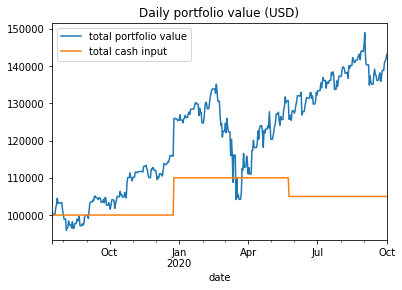

&lt;IPython.core.display.Javascript object&gt;

In [12]:
pf.daily_portfolio_value.plot(label='total portfolio value')
pf.cash.cash_flows['external_cashflows'].plot(label='total cash input')
plt.title("Daily portfolio value (USD)")
plt.legend()
plt.show()

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7f74f0e73910&gt;

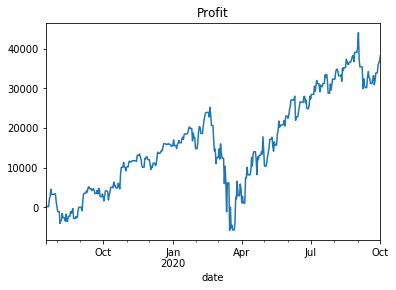

&lt;IPython.core.display.Javascript object&gt;

In [13]:
profit = pf.daily_portfolio_value - pf.cash.cash_flows['external_cashflows']
plt.title("Profit")
profit.plot()

The [ffn](https://pmorissette.github.io/ffn/index.html) library was used for loading data, therefore, we have access to the functionality of the ffn library for analysis. See the [ffn docs](https://pmorissette.github.io/ffn/index.html) for more info on how to utilise the inbuilt functionality.

In [6]:
stats = pf.daily_portfolio_value.calc_stats()

&lt;IPython.core.display.Javascript object&gt;

In [7]:
stats.display()

Stats for None from 2019-07-17 00:00:00 - 2020-10-01 00:00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
44.33%                 1  35.42%  -22.93%

Annualized Returns:
mtd    3m     6m      ytd     1y      3y      5y    10y    incep.
-----  -----  ------  ------  ------  ------  ----  -----  --------
0.89%  8.25%  28.95%  14.15%  39.53%  35.42%  -     -      35.42%

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  1.00     1.86       -
mean    23.78%   29.12%     14.15%
vol     23.86%   15.67%     -
skew    -0.32    0.21       -
kurt    10.43    0.73       -
best    8.63%    12.03%     14.15%
worst   -10.29%  -6.49%     14.15%

Drawdowns:
max      avg       # days
-------  ------  --------
-22.93%  -2.61%     13.14

Misc:
---------------  -------
avg. up month    4.80%
avg. down month  -2.31%
up year %        100.00%
12m up %         100.00%
---

&lt;IPython.core.display.Javascript object&gt;

In [8]:
stats.display_monthly_returns()

  Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct    Nov    Dec    YTD
------  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----
  2019   0      0      0      0      0      0      2.11  -1.34   3.4    5.65   2.56  12.03  26.44
  2020  -0.56  -1.79  -6.49   8.49   2.96   3.92   3.22   4.85  -1.38   0.89   0      0     14.15


&lt;IPython.core.display.Javascript object&gt;